Liceras Rodriguez Luis Fabricio - Ingenieria en Sistemas
Se uso el dataset 2 o numero 156


In [92]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [93]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

**Preprocesamiento del Dataset**

In [94]:
#Se recibe el dataset y realiza el preprocesado
url = "/content/gdrive/MyDrive/Colab Notebooks/Datasets/D2Pluvial_Flood_Dataset.csv"
dataframe = pd.read_csv(url)
print(dataframe)

column_names = [
    'X','Y','Slope','Curvature ' ,'Aspect','TWI','FA',
    'Drainage','Rainfall','SUSCEP'
]

ordinal_encoder = OrdinalEncoder()

for columna in column_names:
    columna_n = dataframe[columna].values.reshape(-1, 1)
    dataframe[columna] = ordinal_encoder.fit_transform(columna_n)
# una columna con valores de calificacion, se convirtio en string y luego a entero
# asignando un valor por cada tipo de calificacion que poseia
dataframe['SUSCEP'] = dataframe['SUSCEP'].astype(str)
Monthly_Balance = dataframe[['SUSCEP']]
dataframe['SUSCEP'] = ordinal_encoder.fit_transform(Monthly_Balance)
#Se eliminan las filas con algun valor nulo
dataframe.dropna(inplace=True)
print(dataframe.isnull().sum())

dataframe.describe()

               X         Y      Slope    Curvature       Aspect       TWI  \
0       3.909444  7.443056  46.686142 -3.888000e+09   45.000000 -3.250368   
1       3.908611  7.442778  52.151768  1.296000e+09   60.945396 -4.313832   
2       3.908889  7.442778  66.484085  0.000000e+00   67.619865 -8.327622   
3       3.909167  7.442778  58.007183 -2.592000e+09   38.659809 -4.707937   
4       3.909444  7.442778  60.503792 -1.296000e+09  351.869904 -5.985817   
...          ...       ...        ...           ...         ...       ...   
144396  3.864167  7.311667  70.837776  1.296000e+09  272.489563 -8.552538   
144397  3.864444  7.311667  72.578880  1.296000e+09  295.559967 -9.347733   
144398  3.864722  7.311667  70.667946  6.480000e+09  322.125031 -9.236161   
144399  3.859722  7.311389  61.980232  1.296000e+09  183.814072 -8.819514   
144400  3.860000  7.311389  68.768135  5.184000e+09  150.945389 -9.134113   

           FA  Drainage    Rainfall     SUSCEP  
0       147.0  228.8528  1

,X,Y,Slope,Curvature,Aspect,TWI,FA,Drainage,Rainfall,SUSCEP
count,144119.000000,144119.000000,144119.000000,144119.000000,144119.000000,144119.000000,144119.000000,144119.000000,144119.000000,144119.000000
mean,217.507726,227.400877,68.138996,26.549379,1392.256989,3405.171948,63.170172,98.000569,16.649422,1.736183
std,100.370370,116.966336,75.000860,3.555811,744.979836,3287.469863,328.879197,56.871073,8.960119,1.367311
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,132.000000,24.000000,24.000000,847.000000,1439.000000,2.000000,49.000000,9.000000,1.000000
50%,218.000000,226.000000,49.000000,27.000000,1426.000000,2138.000000,3.000000,98.000000,17.000000,2.000000
75%,297.000000,321.000000,86.000000,29.000000,2011.000000,3894.000000,8.000000,147.000000,25.000000,3.000000
max,444.000000,474.000000,930.000000,56.000000,2663.000000,17349.000000,3544.000000,196.000000,31.000000,4.000000


In [95]:
print(dataframe)

            X      Y  Slope  Curvature   Aspect      TWI     FA  Drainage  \
0       282.0  474.0   19.0        23.0   331.0  11155.0  149.0     177.0   
1       279.0  473.0   27.0        28.0   460.0   9044.0   63.0     180.0   
2       280.0  473.0   69.0        27.0   519.0   1783.0    3.0     185.0   
3       281.0  473.0   38.0        24.0   278.0   8203.0   53.0     196.0   
4       282.0  473.0   44.0        25.0  2608.0   5240.0   17.0     193.0   
...       ...    ...    ...         ...     ...      ...    ...       ...   
144396  119.0    1.0  102.0        28.0  2027.0   1545.0    3.0      30.0   
144397  120.0    1.0  122.0        28.0  2218.0    740.0    2.0      96.0   
144398  121.0    1.0  100.0        32.0  2415.0    844.0    2.0      62.0   
144399  103.0    0.0   49.0        28.0  1389.0   1265.0    2.0      50.0   
144400  104.0    0.0   84.0        31.0  1196.0    951.0    2.0      29.0   

        Rainfall  SUSCEP  
0           31.0     4.0  
1           24.0     

In [96]:
#Se divide dataframe en dos, caracteristicas y etiquetas
y = dataframe['SUSCEP']
X = dataframe.drop(columns=['SUSCEP'])

In [97]:
labels = y.unique()

#Se muetran los valores unicos
print(labels)
print(len(labels))

[4. 0. 2. 1. 3.]
5


In [98]:
# Dividimos los datos en conjuntos para entrenamiento y para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [99]:
#Se muestra la cantidad de valores que se posee para entrenamiento y test
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

115295
115295
28824
28824


**Clustering**

Prueba del clustering

In [100]:
X_trainNp = X_train.values
y_trainNp= y_train.values

In [101]:
X_testNp = X_test.values
y_testNp= y_test.values

In [102]:
kmeans = KMeans(n_clusters=5, init="random", n_init=20,
                              algorithm="full", random_state=11)
kmeans.fit(X_trainNp)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='full', init='random', n_clusters=5, n_init=20,
       random_state=11)

In [103]:
y_pred = kmeans.predict(X_trainNp)
print('Precisión de entrenamiento: %f' % (np.mean(y_pred == y_trainNp) * 100))

Precisión de entrenamiento: 22.069474


In [104]:
from sklearn.metrics import silhouette_score
silhouette_score(X_trainNp, kmeans.labels_)

0.4011313217721254

Mejor cantidad de grupos para clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.p

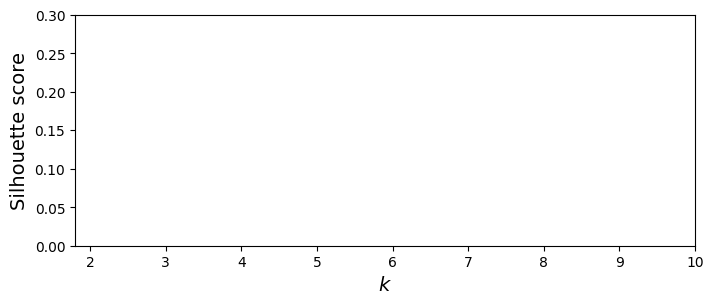

In [105]:
kmeans_per_k = [KMeans(n_clusters=k, init="random", n_init=10, algorithm="full", random_state=11).fit(X_trainNp)
                for k in range(1, 10)]

silhouette_scores = [silhouette_score(X_trainNp, model.labels_)
                     for model in kmeans_per_k[1:]] #se calculan los puntajes de silueta para todos los modelos

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-") #se grafican los puntajes de silueta con puntos azules
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 10.0, 0.0, 0.30]) #se establece el rango para el eje x y el eje y
plt.show()

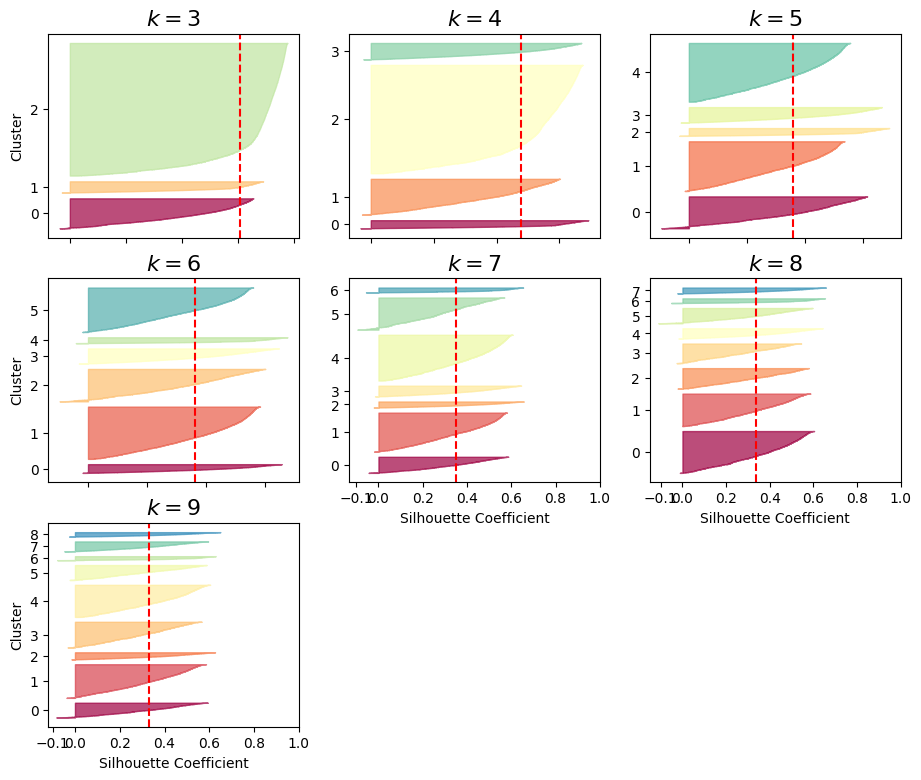

In [106]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))
 # número de filas y columnas en la cuadrícula de subgráficos
n_rows = 3
n_cols = 3

for k in (3, 4, 5, 6, 7, 8, 9): #se itera por los valores de k (numero de clusters)
    index = k - 3
    plt.subplot(n_rows, n_cols, index + 1)

    y_pred = kmeans_per_k[k - 1].labels_#se obtienen las etiquetas
    silhouette_coefficients = silhouette_samples(X_trainNp, y_pred)

    padding = len(X_trainNp) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 6, 9):
        plt.ylabel("Cluster")

    if k in (7, 8, 9):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

**Aprendizaje SemiSupervisado**

In [107]:
from sklearn.cluster import KMeans

#numero de clusters
k = 1000
kmeans = KMeans(n_clusters=k, random_state=42)
#Calcula la distancia entre los datos y los centroides
X_digits_dist = kmeans.fit_transform(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Se obtienen los ejemplos mas representativos para cada uno de los clusters y sus respectivas etiquetas verdaderas.

In [108]:
#calcula los indices de las distancias minimas para cada columna
idxs = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train.values[idxs]

In [109]:
#identifica los labels correspondientes a las muestras mas representativas
y_representative_digits = y_train.values[idxs]

In [114]:
#entrenamiento de un modelo de regresion logistica con one vs all con los datos mas representativos y se hace una prueba de precision.
from sklearn.linear_model import LogisticRegression


log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg2.fit(X_representative_digits, y_representative_digits) #entrena un modelo con los datos y labels representativos
log_reg2.score(X_test, y_test)

CPU times: user 543 ms, sys: 2.3 ms, total: 545 ms
Wall time: 572 ms


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.7356716625034694

In [118]:
#entrenamiento de otro modelo del mismo tipo del anterior pero directamente con las etiquetas reales del dataset.
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

CPU times: user 17.8 s, sys: 9.74 s, total: 27.5 s
Wall time: 20.6 s


0.9261032472939217

In [ ]:
#Segun las etiquetas mas representativas ya clasificadas manualmente hacemos una proparagacion en base a su etiqueta a todos los demas ejemplos de sus clusters.
y_train_propagated = np.empty(len(X_train))
for i in range(k):
  y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [ ]:
#Se entrena otro modelo con las etiquetas propagadas y vemos su presicion
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg3.fit(X_train, y_train_propagated)
log_reg3.score(X_test, y_test)

**Aprendizaje Activo**

In [ ]:
#se obtienen las probabilidades de que las primeras 1000 muestras pertenezcan a cada clase posible
probas = log_reg3.predict_proba(X_train)
labels_ixs = np.argmax(probas, axis=1)
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])
sorted_ixs = np.argsort(labels)
labels[sorted_ixs[:10]] #se muestran las 10 muestras con las menores probabilidades maximas

obtiene las etiquetas de las k muestras con las menores probabilidades maximas de ser clasificadas correctamente

In [116]:
#obtiene las etiquetas de las k muestras con las menores probabilidades maximas de ser clasificadas correctamente
y_lowest = y_train.values[:][sorted_ixs[:k]]
y_lowest

array([3., 1., 3., 3., 1., 2., 3., 1., 1., 3., 3., 2., 3., 1., 1., 2., 0.,
       0., 2., 2., 1., 1., 3., 3., 2., 3., 3., 1., 0., 2., 2., 3., 3., 2.,
       3., 3., 3., 2., 3., 3., 3., 1., 1., 1., 1., 0., 1., 1., 0., 0., 3.,
       1., 3., 1., 0., 2., 3., 3., 3., 3., 1., 2., 3., 4., 3., 1., 1., 3.,
       1., 2., 2., 1., 1., 2., 1., 4., 3., 1., 2., 0., 2., 1., 2., 1., 1.,
       4., 3., 1., 4., 1., 2., 1., 2., 2., 3., 3., 3., 2., 1., 3., 1., 1.,
       2., 3., 1., 0., 3., 3., 2., 3., 1., 2., 3., 0., 0., 2., 2., 0., 1.,
       2., 0., 1., 0., 2., 1., 3., 1., 3., 3., 2., 3., 3., 2., 2., 2., 2.,
       1., 1., 1., 1., 0., 2., 1., 0., 2., 1., 3., 4., 3., 3., 0., 1., 3.,
       2., 3., 1., 1., 1., 2., 2., 3., 0., 1., 0., 1., 1., 2., 3., 1., 4.,
       2., 0., 0., 2., 1., 1., 0., 2., 1., 3., 2., 3., 3., 4., 1., 2., 3.,
       3., 1., 3., 1., 0., 2., 3., 0., 2., 1., 2., 2., 0., 2., 2., 0., 1.,
       1., 3., 1., 2., 3., 1., 2., 1., 0., 0., 1., 2., 3., 0., 1., 1., 1.,
       3., 1., 0., 2., 0.

In [ ]:
y_train2 = y_train_propagated.copy() #copia las filas de las y propagadas
y_train2[sorted_ixs[:k]] = y_lowest

In [117]:
log_reg5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg5.fit(X_train, y_train2)
log_reg5.score(X_test, y_test)

CPU times: user 11.7 s, sys: 6.93 s, total: 18.6 s
Wall time: 12.1 s


0.2624548986955315